# Color Charge Dynamics

This notebook allows the user to recreate essentially all the figures from the paper:

B. L. Inscoe and J. L. Lancaster, "Introducing SU(3) color charge in undergraduate quantum mechanics" while also exploring other aspects of SU(3) dynamics, <i>Am. J. Phys.</i> <b>89</b> 172 (2021). 
[Link](https://aapt.scitation.org/doi/10.1119/10.0002004) | [arXiv](https://arxiv.org/abs/1907.12520)

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from IPython.display import Image

### Definition of Hamiltonian

Gell-Mann matrices (scaled by a factor of $\frac{1}{2}$ for convenience):

$$\displaystyle \hat{t}^{(1)} = \frac{1}{2}\left(\begin{array}{ccc} 0 & 1 & 0 \\ 1 & 0 & 0\\ 0 & 0 & 0\end{array}\right) \;\;\;\;\;\;\;\;\;\; 
\hat{t}^{(2)} = \frac{1}{2}\left(\begin{array}{ccc} 0 & -i & 0 \\ i & 0 & 0\\ 0 & 0 & 0\end{array}\right)\;\;\;\;\;\;\;\;\;\;\hat{t}^{(3)} = \frac{1}{2}\left(\begin{array}{ccc} 1 & 0 & 0 \\ 0 & -1 & 0\\ 0 & 0 & 0\end{array}\right)$$
$$\hat{t}^{(4)} = \frac{1}{2}\left(\begin{array}{ccc} 0 & 0 & 1 \\ 0 & 0 & 0\\ 1 & 0 & 0\end{array}\right)\;\;\;\;\;\;\;\;\;\;
\displaystyle \hat{t}^{(5)} = \frac{1}{2}\left(\begin{array}{ccc} 0 & 0 & -i \\ 0 & 0 & 0\\ i & 0 & 0\end{array}\right) \;\;\;\;\;\;\;\;\;\;
\hat{t}^{(6)} = \frac{1}{2}\left(\begin{array}{ccc} 0 & 0 & 0 \\ 0 & 0 & 1\\ 0 & 1 & 0\end{array}\right)$$
$$\hat{t}^{(7)} = \frac{1}{2}\left(\begin{array}{ccc} 0 & 0 & 0 \\ 0 & 0 & -i\\ 0 & i & 0\end{array}\right)\;\;\;\;\;\;\;\;\;\; 
\hat{t}^{(8)} = \frac{1}{2\sqrt{3}}\left(\begin{array}{ccc} 1 & 0 & 0 \\ 0 & 1 & 0\\ 0 & 0 & -2\end{array}\right)$$\\

For convenience, these are packaged as slices of a three-dimensional array. The $3\times 3$ identity matrix is also defined here and denoted $\hat{t}^{(0)}$.

In [2]:
ts = np.zeros((3,3,8), dtype='complex')
ts[:,:,0] = 0.5*np.matrix([[0,1.0,0],[1.0,0,0],[0,0,0]])  
ts[:,:,1] = 0.5*np.matrix([[0,-1j,0],[1j,0,0],[0,0,0]])  
ts[:,:,2] = 0.5*np.matrix([[1.0,0,0],[0,-1.0,0],[0,0,0]])  
ts[:,:,3] = 0.5*np.matrix([[0,0,1.0],[0,0,0],[1.0,0,0]])  
ts[:,:,4] = 0.5*np.matrix([[0,0,-1j],[0,0,0],[1j,0,0]])  
ts[:,:,5] = 0.5*np.matrix([[0,0,0],[0,0,1.0],[0,1.0,0]])  
ts[:,:,6] = 0.5*np.matrix([[0,0,0],[0,0,-1j],[0,1j,0]])  
ts[:,:,7] = 0.5*np.sqrt(1/3.0)*np.matrix([[1.0,0,0],[0,1.0,0],[0,0,-2.0]])  

#Identity matrix
t0 = np.matrix([[1,0,0],[0,1,0],[0,0,1]])

Here we define some calculation parameters. $N=3$ is the number of color charge sources, $J$ is the two-body interaction strength, $V$ is the antisymmetric, three-body interaction strength and $J_{d}$ is the symmetric three-body interaction strength.

One may set $V = 2\sqrt{3}J/n$ for $n=1,2,3,\cdots$ to obtain closed (periodic) trajectories in the $(q^{(3)},q^{(8)})$ plane.

In [3]:
N = 3
J = 1.0       #two-body interaction strength
V = 2.0#2.0*np.sqrt(3.0)/-0.5     #anti-symmetric three-body interaction strength
Jd = 0.0      #symmetric three-body interaction strength

The antisymmetric structure constants $f_{abc}$ are defined by 

$$\left[\hat{t}^{(\alpha)}, \hat{t}^{(\beta)}\right] = i\sum_{\gamma}f_{\alpha \beta \gamma}\hat{t}^{(\gamma)}.$$

Explicitly, the nonzero components are given by

$$
\begin{array}{ccc}
f_{123} & = & 1\\
f_{147} = f_{246} =  f_{257}  = f_{345} & = & \frac{1}{2}\\
f_{156} = f_{367} & = & -\frac{1}{2}\\
f_{458} = f_{678} & = & \frac{\sqrt{3}}{2}
\end{array}$$

All other nonzero components are obtained by cyclic permutations $f_{bca} = f_{cab} = f_{abc}$ and $f_{bac} = f_{acb} = f_{cba} = -f_{abc}$. The $8^{3} = 256$ entries are mostly zero, and all are stored in a three-dimensional array.

In [4]:
fs = np.zeros((8,8,8))

fs[0,1,2] = 1.0
fs[1,2,0] = 1.0
fs[2,0,1] = 1.0

fs[1,0,2] = -1.0
fs[0,2,1] = -1.0
fs[2,1,0] = -1.0

fs[0,3,6] = 0.5
fs[3,6,0] = 0.5
fs[6,0,3] = 0.5

fs[3,0,6] = -0.5
fs[0,6,3] = -0.5
fs[6,3,0] = -0.5

fs[0,4,5] = -0.5
fs[4,5,0] = -0.5
fs[5,0,4] = -0.5

fs[4,0,5] = 0.5
fs[0,5,4] = 0.5
fs[5,4,0] = 0.5

fs[1,3,5] = 0.5
fs[3,5,1] = 0.5
fs[5,1,3] = 0.5

fs[3,1,5] = -0.5
fs[1,5,3] = -0.5
fs[5,3,1] = -0.5

fs[1,4,6] = 0.5
fs[4,6,1] = 0.5
fs[6,1,4] = 0.5

fs[4,1,6] = -0.5
fs[1,6,4] = -0.5
fs[6,4,1] = -0.5

fs[2,3,4] = 0.5
fs[3,4,2] = 0.5
fs[4,2,3] = 0.5

fs[2,4,3] = -0.5
fs[4,3,2] = -0.5
fs[3,2,4] = -0.5

fs[2,5,6] = -0.5
fs[5,6,2] = -0.5
fs[6,2,5] = -0.5

fs[5,2,6] = 0.5
fs[2,6,5] = 0.5
fs[6,5,2] = 0.5

fs[3,4,7] = np.sqrt(3.0)/2.0
fs[4,7,3] = np.sqrt(3.0)/2.0
fs[7,3,4] = np.sqrt(3.0)/2.0

fs[4,3,7] = -np.sqrt(3.0)/2.0
fs[3,7,4] = -np.sqrt(3.0)/2.0
fs[7,4,3] = -np.sqrt(3.0)/2.0

fs[5,6,7] = np.sqrt(3.0)/2.0
fs[6,7,5] = np.sqrt(3.0)/2.0
fs[7,5,6] = np.sqrt(3.0)/2.0

fs[6,5,7] = -np.sqrt(3.0)/2.0
fs[5,7,6] = -np.sqrt(3.0)/2.0
fs[7,6,5] = -np.sqrt(3.0)/2.0

The symmetric structure constants $d_{abc}$ are defined by 

$$\left\{ \hat{t}^{(\alpha)},\hat{t}^{(\beta)}\right\} = \frac{1}{3}\delta_{\alpha \beta} + \sum_{\gamma}d_{\alpha\beta\gamma}\hat{t}^{(\gamma)}.$$

Explicitly, the nonzero components are given by

$$
\begin{array}{ccc}
d_{118} = d_{228} = d_{338} = -d_{888} & = & \frac{1}{\sqrt{3}}\\
d_{146} = d_{157} = d_{256} = d_{344} = d_{355} & = & \frac{1}{2}\\
d_{247} = d_{366} = d_{377} & = & -\frac{1}{2}\\ 
d_{448} = d_{558} = d_{668} = d_{778} & = & -\frac{1}{2\sqrt{3}}.
\end{array}$$

All other nonzero components are obtained by cyclic permutations $d_{bca} = d_{cab} = d_{bac} = d_{acb} = d_{cba} = d_{abc}$. The $8^{3} = 256$ entries are mostly zero, and all are stored in a three-dimensional array.

In [5]:
ds = np.zeros((8,8,8))

ds[0,0,7] = 1.0/np.sqrt(3.0)
ds[0,7,0] = 1.0/np.sqrt(3.0)
ds[7,0,0] = 1.0/np.sqrt(3.0)

ds[1,1,7] = 1.0/np.sqrt(3.0)
ds[1,7,1] = 1.0/np.sqrt(3.0)
ds[7,1,1] = 1.0/np.sqrt(3.0)

ds[2,2,7] = 1.0/np.sqrt(3.0)
ds[2,7,2] = 1.0/np.sqrt(3.0)
ds[7,2,2] = 1.0/np.sqrt(3.0)

ds[7,7,7] = -1.0/np.sqrt(3.0)

ds[3,3,7] = -0.5/np.sqrt(3.0)
ds[3,7,3] = -0.5/np.sqrt(3.0)
ds[7,3,3] = -0.5/np.sqrt(3.0)

ds[4,4,7] = -0.5/np.sqrt(3.0)
ds[4,7,4] = -0.5/np.sqrt(3.0)
ds[7,4,4] = -0.5/np.sqrt(3.0)

ds[5,5,7] = -0.5/np.sqrt(3.0)
ds[5,7,5] = -0.5/np.sqrt(3.0)
ds[7,5,5] = -0.5/np.sqrt(3.0)

ds[6,6,7] = -0.5/np.sqrt(3.0)
ds[6,7,6] = -0.5/np.sqrt(3.0)
ds[7,6,6] = -0.5/np.sqrt(3.0)

ds[0,3,5] = 0.5
ds[3,5,0] = 0.5
ds[5,0,3] = 0.5
ds[3,0,5] = 0.5
ds[0,5,3] = 0.5
ds[5,3,0] = 0.5

ds[0,4,6] = 0.5
ds[4,6,0] = 0.5
ds[6,0,4] = 0.5
ds[4,0,6] = 0.5
ds[0,6,4] = 0.5
ds[6,4,0] = 0.5

ds[1,3,6] = -0.5
ds[3,6,1] = -0.5
ds[6,1,3] = -0.5
ds[1,6,3] = -0.5
ds[6,3,1] = -0.5
ds[3,1,6] = -0.5

ds[1,4,5] = 0.5
ds[4,5,1] = 0.5
ds[5,1,4] = 0.5
ds[1,5,4] = 0.5
ds[5,4,1] = 0.5
ds[4,1,5] = 0.5

ds[2,3,3] = 0.5
ds[3,2,3] = 0.5
ds[3,3,2] = 0.5

ds[2,4,4] = 0.5
ds[4,2,4] = 0.5
ds[4,4,2] = 0.5

ds[2,5,5] = -0.5
ds[5,2,5] = -0.5
ds[5,5,2] = -0.5

ds[2,6,6] = -0.5
ds[6,2,6] = -0.5
ds[6,6,2] = -0.5

In terms of the generators $\hat{t}^{(n)}$, the interactionHamiltonian takes the form $\hat{H} = \hat{H}_{2}+\hat{H}'$ with

$$\displaystyle \hat{H}_{2} = J\sum_{n=1}^{8}\left(\hat{t}^{(n)}_{1}\cdot \hat{t}_{2}^{(n)} + \hat{t}^{(n)}_{1}\cdot\hat{t}_{3}^{(n)} + \hat{t}^{(n)}_{2}\cdot\hat{t}_{3}^{(n)}\right)$$
$$\displaystyle \hat{H}' = \sum_{a,b,c}\left[Vf_{abc} + J_{d}d_{abc}\right]\hat{t}_{1}^{(a)}\cdot\hat{t}_{2}^{(b)}\cdot\hat{t}_{3}^{(c)}.$$

In [6]:
H = 0.0*np.kron(t0,np.kron(t0,t0))
H2 = 0.0*np.kron(t0,np.kron(t0,t0))
H3s = 0.0*np.kron(t0,np.kron(t0,t0))
H3a = 0.0*np.kron(t0,np.kron(t0,t0))

for i in range(0,8):
    H2 = H2 + J*np.kron(t0,np.kron(ts[:,:,i],ts[:,:,i]))
    H2 = H2 + J*np.kron(ts[:,:,i],np.kron(t0,ts[:,:,i]))
    H2 = H2 + J*np.kron(ts[:,:,i],np.kron(ts[:,:,i],t0))
    
for i in range(0,8):
    for j in range(0,8):
        for k in range(0,8):
            H3s = H3s + Jd*ds[i,j,k]*np.kron(ts[:,:,i],np.kron(ts[:,:,j],ts[:,:,k]))
            H3a = H3a + V*fs[i,j,k]*np.kron(ts[:,:,i],np.kron(ts[:,:,j],ts[:,:,k]))
            
            #Comment out the above two lines and uncomment the following
            #to consider random couplings drawn from [0,V]
            
            #H = H + V*np.random.rand()*np.kron(tl[:,:,i],np.kron(tl[:,:,j],tl[:,:,k]))

H = H2 + H3s + H3a

### Definition of Initial State

The color state for a single color charge (i.e., a quark) takes the form

$\displaystyle \left|\chi_{1}\right\rangle \rightarrow \left(\begin{array}{c} \alpha\\ \beta\\ \gamma\end{array}\right)$

For a simple product state describing three charges, we need the tensor product

$\left| \chi\right\rangle = \left|\chi_{1}\right\rangle \otimes \left|\chi_{2}\right\rangle \otimes \left|\chi_{3}\right\rangle$

which is implemented as the Kronecker product. 

In [7]:
#red

a1 = 1.0
b1 = 0.0
c1 = 0.0

chi1 = [a1, b1, c1]

#blue

a2 = 0.0
b2 = 1.0
c2 = 0.0

chi2 = [a2, b2, c2]

#green

a3 = 0.0
b3 = 0.0
c3 = 1.0

chi3 = [a3, b3, c3]

chi = np.kron(chi1,np.kron(chi2,chi3)) #initial state 
chi.shape = (3**3,1)



(Aside on alternate constructions)

Spin-$\frac{1}{2}$ (SU$(2)$) state representations $\left(\begin{array}{c} a\\ b\end{array}\right)$ may be parameterized by two real numbers $(\theta,\phi)$ despite $a$ and $b$ being two complex numbers--generally requiring a total of  <i>four</i> real numbers to specify. The normalization $|a|^{2}+|b|^{2} = 1$ and insignificance of overall phase factor reduce the number of required real parameters from four to two, leading to the so-called Bloch sphere.

A similar type of reduction is possible for SU$(3)$ states $\left(\begin{array}{c} a\\ b\\ c\end{array}\right)$. The unique states corresponding to choices complex values for $a$, $b$, and $c$ may be entirely parameterized by four real numbers $(\alpha, \beta, \gamma, \theta)$ as

$$\begin{array}{ccc}
a & = & e^{i(\alpha + \gamma)}\cos\beta \sin\theta,\\
b & = & e^{-i(\alpha - \gamma)}\sin\beta \sin\theta,\\
c & = & \cos\theta.
\end{array}$$

In [8]:
#BLOCH-SPHERE-LIKE PARAMETERIZATION
# al = -np.pi/3
# be = np.pi/12
# ga = np.pi/5
# th = np.pi/3

# a = np.exp(1j*(al+ga))*np.cos(be)*np.sin(th)
# b = np.exp(-1j*(al-ga))*np.sin(be)*np.sin(th)
# c = np.cos(th)

One can also begin from the singlet configuration given by
$$ \left|\Psi_{singlet}\right\rangle = \frac{1}{\sqrt{6}}\left(\left|rgb\right\rangle - \left|rbg\right\rangle + \left|brg\right\rangle - \left|bgr\right\rangle + \left|gbr\right\rangle - \left|grb\right\rangle\right)$$

In [9]:
#SINGLET CONFIGURATION
#chi = (1/np.sqrt(6))*(np.kron(chi1,np.kron(chi2,chi3))-np.kron(chi1,np.kron(chi3,chi2)))
#chi = chi + (1/np.sqrt(6))*(np.kron(chi3,np.kron(chi1,chi2))-np.kron(chi3,np.kron(chi2,chi1)))
#chi = chi + (1/np.sqrt(6))*(np.kron(chi2,np.kron(chi3,chi1))-np.kron(chi2,np.kron(chi1,chi3)))

### Dynamics

We first solve for the eigenvalues $\epsilon_{n}$ and eigenvectors $\left|\phi_{n}\right\rangle$ of the Hamiltonian $\hat{H}$,

$$\hat{H}\left|\phi_{n}\right\rangle = \epsilon_{n}\left|\phi_{n}\right\rangle$$

In [10]:
w,v = np.linalg.eigh(H)                          #diagonalize H, gives the eigenvalues (w) and eigenvectors (v)

We now initialize empty arrays to store values of the color-charge expectation values. Also defined here are the number of time samples and time array to be used in dynamics calculations.

In [11]:
Nt = 1000
tmax = 50
t = np.linspace(0,tmax,Nt) 

q11 = np.zeros(Nt)
q12 = np.zeros(Nt)
q13 = np.zeros(Nt)
q14 = np.zeros(Nt)
q15 = np.zeros(Nt)
q16 = np.zeros(Nt)
q17 = np.zeros(Nt)
q18 = np.zeros(Nt)

q21 = np.zeros(Nt)
q22 = np.zeros(Nt)
q23 = np.zeros(Nt)
q24 = np.zeros(Nt)
q25 = np.zeros(Nt)
q26 = np.zeros(Nt)
q27 = np.zeros(Nt)
q28 = np.zeros(Nt)

q31 = np.zeros(Nt)
q32 = np.zeros(Nt)
q33 = np.zeros(Nt)
q34 = np.zeros(Nt)
q35 = np.zeros(Nt)
q36 = np.zeros(Nt)
q37 = np.zeros(Nt)
q38 = np.zeros(Nt)

Time evolution performed on $\left|\chi\right\rangle$ by writing

$\displaystyle \left|\chi\right\rangle = \sum_{n=1}^{27}\left\langle \phi_{n}\right.\left|\chi\right\rangle \left|\phi_{n}\right\rangle$

where the $\left|\phi_{n}\right\rangle$ are the eigenstates of the Hamiltonian which span the system. Since these evolve in time according to $\left|\phi_{n}(t)\right\rangle = e^{-i\epsilon_{n}t}\left|\phi_{n}\right\rangle$, we have

$\displaystyle \left|\chi(t)\right\rangle = \sum_{n=1}^{27}\left\langle \phi_{n}\right.\left|\chi\right\rangle e^{-i\epsilon_{n}t}\left|\phi_{n}\right\rangle$

Once we have $\left|\chi(t)\right\rangle$, time-dependent observables are obtained via the inner product $\left\langle\hat{O}\right\rangle = \left\langle \chi(t)\right|\hat{O}\left|\chi(t)\right\rangle$. For example, $q^{(n)}_{1}$ ($n^{th}$ component of color charge for color charge 1) would be

$\displaystyle q_{1}^{(n)} = \left\langle\chi(t)\right|\hat{t}^{(n)}\otimes I\otimes I\left|\chi(t)\right\rangle$

where $I$ is the $3\times 3$ identity matrix.

#### Operator Definitions

In [12]:
q11op = np.kron(ts[:,:,0],np.kron(t0,t0))
q12op = np.kron(ts[:,:,1],np.kron(t0,t0))
q13op = np.kron(ts[:,:,2],np.kron(t0,t0))
q14op = np.kron(ts[:,:,3],np.kron(t0,t0))
q15op = np.kron(ts[:,:,4],np.kron(t0,t0))
q16op = np.kron(ts[:,:,5],np.kron(t0,t0))
q17op = np.kron(ts[:,:,6],np.kron(t0,t0))
q18op = np.kron(ts[:,:,7],np.kron(t0,t0))

q21op = np.kron(t0,np.kron(ts[:,:,0],t0))
q22op = np.kron(t0,np.kron(ts[:,:,1],t0))
q23op = np.kron(t0,np.kron(ts[:,:,2],t0))
q24op = np.kron(t0,np.kron(ts[:,:,3],t0))
q25op = np.kron(t0,np.kron(ts[:,:,4],t0))
q26op = np.kron(t0,np.kron(ts[:,:,5],t0))
q27op = np.kron(t0,np.kron(ts[:,:,6],t0))
q28op = np.kron(t0,np.kron(ts[:,:,7],t0))

q31op = np.kron(t0,np.kron(t0,ts[:,:,0]))
q32op = np.kron(t0,np.kron(t0,ts[:,:,1]))
q33op = np.kron(t0,np.kron(t0,ts[:,:,2]))
q34op = np.kron(t0,np.kron(t0,ts[:,:,3]))
q35op = np.kron(t0,np.kron(t0,ts[:,:,4]))
q36op = np.kron(t0,np.kron(t0,ts[:,:,5]))
q37op = np.kron(t0,np.kron(t0,ts[:,:,6]))
q38op = np.kron(t0,np.kron(t0,ts[:,:,7]))

#### Time Evolution

In [13]:
for n in range(0,Nt):
    psi = np.zeros(3**3) 
    psi.shape = (3**3,1)
    Ut = np.zeros((3**3,3**3))
    
    for i in range(0,3**3,):
        phin = v[:,i]
        phin.shape = (3**3,1)
        phint = np.conj(phin.transpose())

        psi = psi + np.asscalar(phint.dot(chi))*np.exp(-1j*np.real(w[i])*t[n])*phin
        
        Ut = Ut + np.exp(1j*np.real(w[i])*t[n])*np.outer(phin,phint)
    
    psit = np.conj(psi.transpose())
    chit = np.conj(chi.transpose())
    
    q11[n] = np.real(psit.dot(np.dot(q11op,psi)))
    q12[n] = np.real(psit.dot(np.dot(q12op,psi)))
    q13[n] = np.real(psit.dot(np.dot(q13op,psi)))
    q14[n] = np.real(psit.dot(np.dot(q14op,psi)))
    q15[n] = np.real(psit.dot(np.dot(q15op,psi)))
    q16[n] = np.real(psit.dot(np.dot(q16op,psi)))
    q17[n] = np.real(psit.dot(np.dot(q17op,psi)))
    q18[n] = np.real(psit.dot(np.dot(q18op,psi)))
    
    q21[n] = np.real(psit.dot(np.dot(q21op,psi)))
    q22[n] = np.real(psit.dot(np.dot(q22op,psi)))
    q23[n] = np.real(psit.dot(np.dot(q23op,psi)))
    q24[n] = np.real(psit.dot(np.dot(q24op,psi)))
    q25[n] = np.real(psit.dot(np.dot(q25op,psi)))
    q26[n] = np.real(psit.dot(np.dot(q26op,psi)))
    q27[n] = np.real(psit.dot(np.dot(q27op,psi)))
    q28[n] = np.real(psit.dot(np.dot(q28op,psi)))
    
    q31[n] = np.real(psit.dot(np.dot(q31op,psi)))
    q32[n] = np.real(psit.dot(np.dot(q32op,psi)))
    q33[n] = np.real(psit.dot(np.dot(q33op,psi)))
    q34[n] = np.real(psit.dot(np.dot(q34op,psi)))
    q35[n] = np.real(psit.dot(np.dot(q35op,psi)))
    q36[n] = np.real(psit.dot(np.dot(q36op,psi)))
    q37[n] = np.real(psit.dot(np.dot(q37op,psi)))
    q38[n] = np.real(psit.dot(np.dot(q38op,psi)))

<ipython-input-13-13293f14789e>:11: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  psi = psi + np.asscalar(phint.dot(chi))*np.exp(-1j*np.real(w[i])*t[n])*phin


### Plots

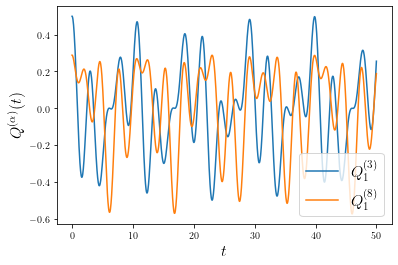

In [14]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.plot(t,q13, label = "$Q_{1}^{(3)}$")    
plt.plot(t,q18, label = "$Q_{1}^{(8)}$")
plt.legend(loc="lower right",prop={'size':16})
plt.xlabel(r'$t$',fontsize=16)
plt.ylabel(r'$Q^{(\alpha)}(t)$',fontsize=16)
plt.show()

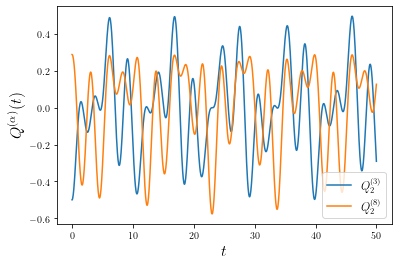

In [15]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.plot(t,q23, label = "$Q_{2}^{(3)}$")    
plt.plot(t,q28, label = "$Q_{2}^{(8)}$")
plt.legend(loc="lower right",prop={'size':12})
plt.xlabel(r'$t$',fontsize=16)
plt.ylabel(r'$Q^{(\alpha)}(t)$',fontsize=16)
plt.show()

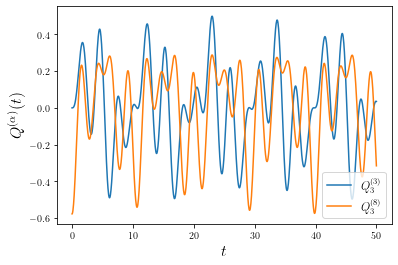

In [16]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.plot(t,q33, label = "$Q_{3}^{(3)}$")    
plt.plot(t,q38, label = "$Q_{3}^{(8)}$")
plt.legend(loc="lower right",prop={'size':12})
plt.xlabel(r'$t$',fontsize=16)
plt.ylabel(r'$Q^{(\alpha)}(t)$',fontsize=16)
plt.show()

### Comparison with analytic solution

For the simple product initital state, $\left|\chi(0)\right\rangle = \left|r\right\rangle\otimes\left|g\right\rangle\otimes\left|b\right\rangle$, we can compare the numerical results to the analytic solution ($J_{d} = 0$)

$$Q_{3}^{(3)}(t) = \frac{2\sin\left(\frac{\sqrt{3}Vt}{4}\right)}{3\sqrt{3}}\left[\cos\left(\frac{\sqrt{3}Vt}{4}\right)-\cos\left(\frac{3Jt}{2}\right)\right],$$
$$Q_{3}^{(8)}(t) = -\frac{2\cos\left(\frac{\sqrt{3}Vt}{4}\right)}{3\sqrt{3}}\left[\cos\left(\frac{\sqrt{3}Vt}{4}\right) + \cos\left(\frac{3Jt}{2}\right)\right] + \frac{1}{3\sqrt{3}}.$$

Other components follow from rotations by 120 degrees.

$Q_{3}^{(3,8)}$

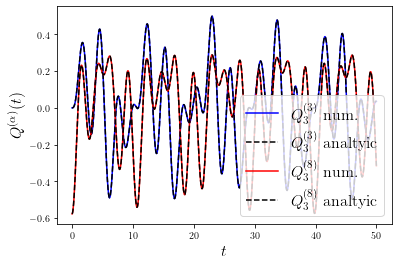

In [17]:
Q33an = 2.0*np.sin(np.sqrt(3.0)*V*t/4.0)/(3.0*np.sqrt(3.0))*(np.cos(np.sqrt(3.0)*V*t/4.0)-np.cos(3.0*J*t/2))
Q38an = -2.0*np.cos(np.sqrt(3.0)*V*t/4.0)/(3.0*np.sqrt(3.0))*(np.cos(3.0*J*t/2)+np.cos(np.sqrt(3.0)*V*t/4.0)) + 1.0/(3.0*np.sqrt(3.0))
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.plot(t,q33,'b-', label = "$Q_{3}^{(3)}$ num.")    
plt.plot(t,Q33an,'k--', label = "$Q_{3}^{(3)}$ analtyic")
plt.plot(t,q38,'r-', label = "$Q_{3}^{(8)}$ num.")    
plt.plot(t,Q38an,'k--', label = "$Q_{3}^{(8)}$ analtyic")
plt.legend(loc="lower right",prop={'size':16})
plt.xlabel(r'$t$',fontsize=16)
plt.ylabel(r'$Q^{(\alpha)}(t)$',fontsize=16)
plt.show()

$Q_{1}^{(3,8)}$ (counterclockwise rotation by $2\pi/3$)

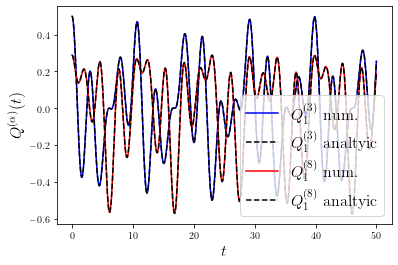

In [18]:
pi = 4.0*np.arctan(1.0)
Q13an = np.cos(2.0*pi/3.0)*Q33an - np.sin(2.0*pi/3.0)*Q38an
Q18an = np.sin(2.0*pi/3.0)*Q33an + np.cos(2.0*pi/3.0)*Q38an
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.plot(t,q13,'b-', label = "$Q_{1}^{(3)}$ num.")    
plt.plot(t,Q13an,'k--', label = "$Q_{1}^{(3)}$ analtyic")
plt.plot(t,q18,'r-', label = "$Q_{1}^{(8)}$ num.")    
plt.plot(t,Q18an,'k--', label = "$Q_{1}^{(8)}$ analtyic")
plt.legend(loc="lower right",prop={'size':16})
plt.xlabel(r'$t$',fontsize=16)
plt.ylabel(r'$Q^{(\alpha)}(t)$',fontsize=16)
plt.show()

$Q_{2}^{(3,8)}$ (clockwise rotation by $2\pi/3$)

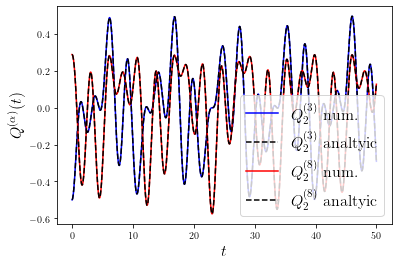

In [19]:
Q23an = np.cos(2.0*pi/3.0)*Q33an - np.sin(-2.0*pi/3.0)*Q38an
Q28an = np.sin(-2.0*pi/3.0)*Q33an + np.cos(2.0*pi/3.0)*Q38an
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.plot(t,q23,'b-', label = "$Q_{2}^{(3)}$ num.")    
plt.plot(t,Q23an,'k--', label = "$Q_{2}^{(3)}$ analtyic")
plt.plot(t,q28,'r-', label = "$Q_{2}^{(8)}$ num.")    
plt.plot(t,Q28an,'k--', label = "$Q_{2}^{(8)}$ analtyic")
plt.legend(loc="lower right",prop={'size':16})
plt.xlabel(r'$t$',fontsize=16)
plt.ylabel(r'$Q^{(\alpha)}(t)$',fontsize=16)
plt.show()

### Trajectory in $(q^{(3)},q^{(8)})$ plane

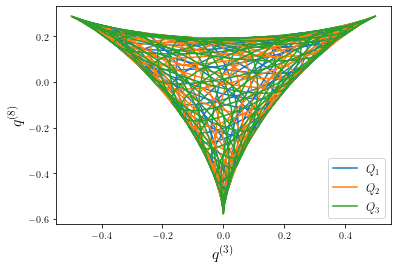

In [20]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.plot(q13,q18, label = "$Q_{1}$")   
plt.plot(q23,q28, label = "$Q_{2}$")   
plt.plot(q33,q38, label = "$Q_{3}$")   
plt.legend(loc="lower right",prop={'size':12})
plt.xlabel(r'$q^{(3)}$',fontsize=16)
plt.ylabel(r'$q^{(8)}$',fontsize=16)
plt.show()

## VPython Visualization

The VPython visualization routine colors the sources by mapping the angle from the positive $q^{(3)}$ axis to a particular hue angle on the color wheel. In the Hue-Saturation-Value (HSV) color model, a hue is defined by an angle $\theta$ with red, green and blue corresponding to $\theta_{r} = 0^{\circ}$, $\theta_{g} = 120^{\circ}$ and $\theta_{ b} = 120^{\circ}$, respectively. The vectors ${\bf Q}_{r,g,b}$ in color space correspond to angles $\phi_{r} = 30^{\circ}$, $\phi_{ g} = 150^{\circ}$ and $\phi_{b} = 270^{\circ}$, respectively, as measured from the $q^{(3)}$ axis in the $(q^{(3)},q^{(8)})$ plane. The colors depicted below are obtained by calculating the corresponding hue angle $\theta= \phi - 30^{\circ}$, so that
$$\tan(\theta+30^{\circ}) = \frac{q^{(8)}}{q^{(3)}}.$$

In [21]:
from vpython import *

scene = canvas()

scene.background=vector(1.0,1.0,1.0)
scene.ambient=color.white

No = 1.0
ba = arrow(pos=vector((1.0-0.5/No)*q33[0],(1.0-0.5/No)*q38[0],0), axis=vector(q33[0]/No,q38[0]/No,0), shaftwidth=0.05, color=vector(0,0,1), emissive=True)
ra = arrow(pos=vector((1.0-0.5/No)*q13[0],(1.0-0.5/No)*q18[0],0), axis=vector(q13[0]/No,q18[0]/No,0), shaftwidth=0.05, color=vector(1,0,0), emissive=True)
ga = arrow(pos=vector((1.0-0.5/No)*q23[0],(1.0-0.5/No)*q28[0],0), axis=vector(q23[0]/No,q28[0]/No,0), shaftwidth=0.05, color=vector(0,1,0), emissive=True)

blue_quark = sphere(pos=vector(q33[0],q38[0],0), radius=0.05, color=vector(0,0,1), emissive=True)
red_quark = sphere(pos=vector(q13[0],q18[0],0), radius=0.05, color=vector(1,0,0), emissive=True)
green_quark = sphere(pos=vector(q23[0],q28[0],0), radius=0.05, color=vector(0,1,0), emissive=True)

bt = sphere(pos=vector((1.0+0.5/No)*q33[0],(1.0+0.5/No)*q38[0],0), radius=0.005, color=vector(0,0,1), emissive=True, make_trail=True)
rt = sphere(pos=vector((1.0+0.5/No)*q13[0],(1.0+0.5/No)*q18[0],0), radius=0.005, color=vector(1,0,0), emissive=True, make_trail=True)
gt = sphere(pos=vector((1.0+0.5/No)*q23[0],(1.0+0.5/No)*q28[0],0), radius=0.005, color=vector(0,1,0), emissive=True, make_trail=True)

scene.waitfor("click")

n = 0
for i in range(0,Nt):
    rate(30) #100 frames /sec in a real clock
    ba.axis = vector(q33[i]/No,q38[i]/No,0)
    ra.axis = vector(q13[i]/No,q18[i]/No,0)
    ga.axis = vector(q23[i]/No,q28[i]/No,0)
    
    ba.pos = vector(q33[0]-0.5*q33[i]/No,q38[0]-0.5*q38[i]/No,0)
    ra.pos = vector(q13[0]-0.5*q13[i]/No,q18[0]-0.5*q18[i]/No,0)
    ga.pos = vector(q23[0]-0.5*q23[i]/No,q28[0]-0.5*q28[i]/No,0)
    
    bt.pos = vector(q33[0]+0.5*q33[i]/No,q38[0]+0.5*q38[i]/No,0)
    rt.pos = vector(q13[0]+0.5*q13[i]/No,q18[0]+0.5*q18[i]/No,0)
    gt.pos = vector(q23[0]+0.5*q23[i]/No,q28[0]+0.5*q28[i]/No,0)
    
    #change of color to anti-color functions
    hb = (np.mod(11.0*np.pi/6.0 + np.arctan2(q38[i],q33[i]),2.0*np.pi)/(2.0*np.pi))  #hue
    sb = ((q33[i]**2 + q38[i]**2)/max(q33**2 + q38**2))**(1/7)     #saturation, (qurks get whiter near origin)
    blue_quark.color = color.hsv_to_rgb(vector(hb,sb,1.0))
    ba.color = color.hsv_to_rgb(vector(hb,sb,1.0))
    
    hr = (np.mod(11.0*np.pi/6.0 + np.arctan2(q18[i],q13[i]),2.0*np.pi)/(2.0*np.pi))  #hue
    sr = ((q13[i]**2 + q18[i]**2)/max(q13**2 + q18**2))**(1/7)
    red_quark.color = color.hsv_to_rgb(vector(hr,sr,1.0))
    ra.color = color.hsv_to_rgb(vector(hr,sr,1.0))
    
    hg = (np.mod(11.0*np.pi/6.0 + np.arctan2(q28[i],q23[i]),2.0*np.pi)/(2.0*np.pi))  #hue
    sg = ((q23[i]**2 + q28[i]**2)/max(q23**2 + q28**2))**(1/7)  
    green_quark.color = color.hsv_to_rgb(vector(hg,sg,1.0))
    ga.color = color.hsv_to_rgb(vector(hg,sg,1.0))
    
    bt.color = color.hsv_to_rgb(vector(hb,sb,1.0))
    rt.color = color.hsv_to_rgb(vector(hr,sr,1.0))
    gt.color = color.hsv_to_rgb(vector(hg,sg,1.0))
    
    rt.trail_color = color.hsv_to_rgb(vector(hr,sr,1.0))
    bt.trail_color = color.hsv_to_rgb(vector(hb,sb,1.0))
    gt.trail_color = color.hsv_to_rgb(vector(hg,sg,1.0))


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>